In [13]:
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
import cmath

In [14]:
from scipy.integrate import quad

### Ques1

a0= 0.7853981633974483
an= [ 6.36619772e-01  1.38777878e-16  7.07355303e-02 -1.31838984e-16
  2.54647909e-02 -9.93923338e-17  1.29922403e-02 -5.03069808e-17]
bn= [1.         0.5        0.33333333 0.25       0.2        0.16666667
 0.14285714 0.125     ]


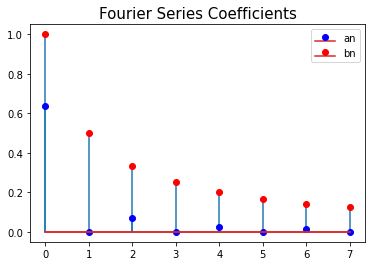

In [15]:
def q1f(x):
    if -np.pi<=x<0 :
        return 0
    elif 0 <= x <= np.pi:
        return np.pi-x


def fourier(li,lf,n,f):
    l=(lf-li)/2
    a0=1/l*quad(lambda x: f(x),li,lf)[0]
    A=np.zeros((n))
    B=np.zeros((n))
    for i in range(1,n+1):
        A[i-1]=1/l*quad(lambda x: f(x)*np.cos(i*np.pi*x/l),li,lf)[0]
        B[i-1]=1/l*quad(lambda x: f(x)*np.sin(i*np.pi*x/l),li,lf)[0]
    return [a0/2, A, B]


li=-np.pi
lf=np.pi
n=8
coeff=fourier(li,lf,n,q1f)
a0=str(coeff[0])
an=str(coeff[1])
bn=str(coeff[2])
print('a0=',a0)
print('an=',an)
print('bn=',bn)


plt.stem(coeff[1],markerfmt='bo',label='an')
plt.stem(coeff[2],markerfmt='ro',label='bn')
plt.legend()
plt.title('Fourier Series Coefficients',size=15)
plt.show()

### Ques2

a0= 2.2210637634541766e-17
an= [ 8.10569469e-01 -1.87279247e-17  9.00632743e-02 -4.59643384e-17
  3.24227788e-02  9.73237096e-18  1.65422341e-02  1.33341207e-16]
bn= [ 1.98107817e-17 -1.34529805e-17 -2.31565816e-17 -1.58058289e-17
 -6.96556078e-17  7.11882679e-17 -6.27441202e-17  2.95883748e-17]


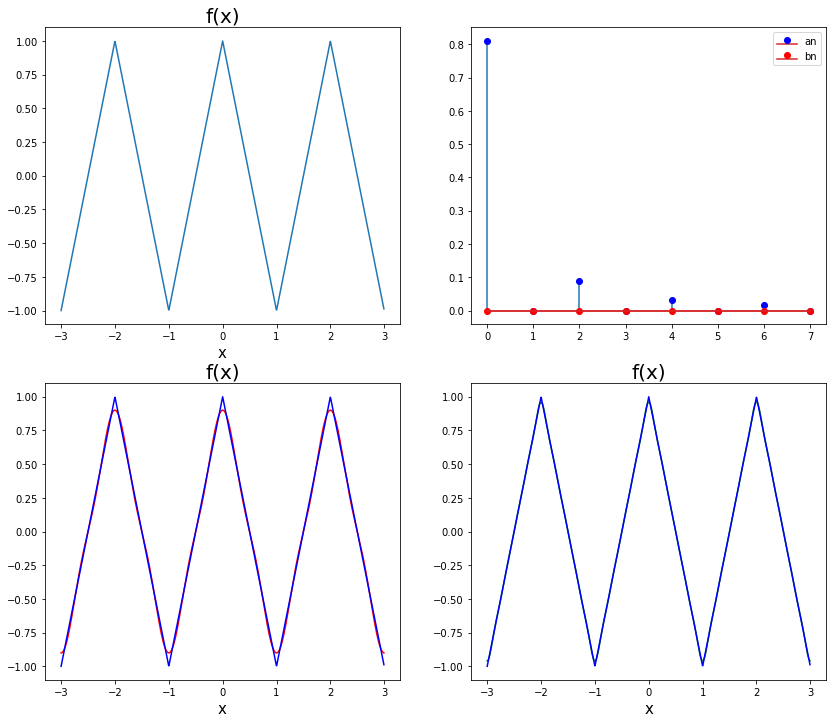

In [16]:
from scipy.signal import sawtooth
L=3
fr=1.5
sam=1000
#sawtooth function
def sawtoothfunc(x):
    L=3
    fr=1.5
    sam=1000

    y=sawtooth(2*np.pi*(x-1)*fr/L,width=0.5)
    return y

#partial sum for order n
def fouriersum(f,n):
    li=-1
    lf=1
    l=(lf-li)/2
    coeff=fourier(li,lf,n,f)
    a0=coeff[0]
    an=coeff[1]
    bn=coeff[2]
    stsum=a0/2
    for i in range(1,n+1):
        stsum=stsum+(an[i-1]*np.cos(i*np.pi*x/l))+(bn[i-1]*np.sin(i*np.pi*x/l))
    return stsum

#Calculating fourier coefficients
st_coeff=fourier(-1,1,8,sawtoothfunc)
st_a0=str(st_coeff[0])
st_an=str(st_coeff[1])
st_an1=st_coeff[1]
st_bn=str(st_coeff[2])
st_bn1=st_coeff[2]
print('a0=',st_a0)
print('an=',st_an)
print('bn=',st_bn)

plt.figure(figsize=(14,12))

#plotting input function
plt.subplot(221)
x=np.linspace(-L,L,sam,endpoint=False)
y=sawtoothfunc(x)
plt.plot(x,y)
plt.title('f(x)' , size= 20)
plt.xlabel('x' , size = 15 )

#plotting fourier coefficients
plt.subplot(222)
plt.stem(st_coeff[1],markerfmt='bo',label='an')
plt.stem(st_coeff[2],markerfmt='ro',label='bn')
plt.legend()

#partial sum for order 3
plt.subplot(223)
plt.plot(x,fouriersum(sawtoothfunc,3),'r')
plt.plot(x,y,'b')
plt.title('f(x)' , size= 20)
plt.xlabel('x' , size = 15 )

#partial sum for order 3
plt.subplot(224)
plt.plot(x,fouriersum(sawtoothfunc,9),'green')
plt.plot(x,y,'b')
plt.title('f(x)' , size= 20)
plt.xlabel('x' , size = 15 )
plt.show()

### Ques3

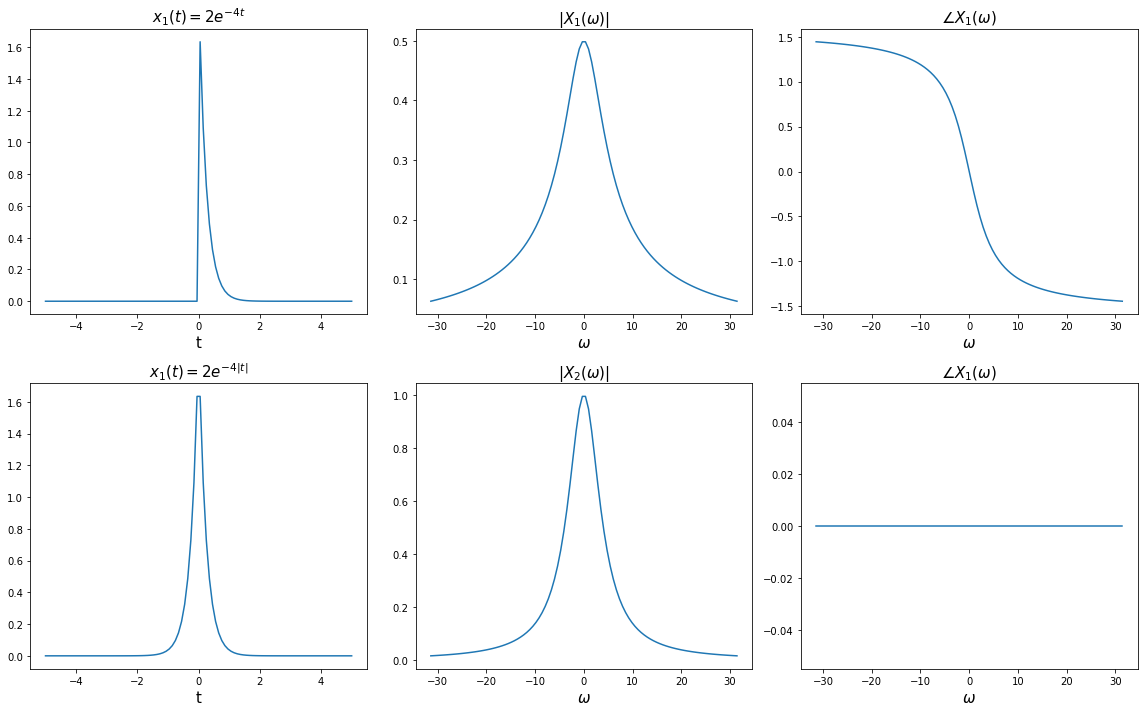

In [17]:
#function for fourier transform
def fourier_transform(t,x,w,lmt=[-np.inf,np.inf]):
    l,u=lmt
    reseq = []
    imseq=[]
    for i in w:
        reseq.append(quad(lambda t: x(t)*np.real(np.exp(-1j*i*t)),l,u)[0])
        imseq.append(quad(lambda t: x(t)*np.imag(np.exp(-1j*i*t)),l,u)[0])
    mag = np.sqrt(np.power(reseq,2)+np.power(imseq,2))
    ph = np.arctan2(imseq,reseq)
    
    return mag , ph

A=2
a=4
#3a func
def q3afunc(t):
    return A*(t>=0)*np.exp(-a*t)

#3b func
def q3bfunc(t):
    return A*np.exp(-a*abs(t))

t1 = np.linspace(-5,5,100)
w1 = np.linspace(-10*np.pi,10*np.pi,100)


q3am,q3ap = fourier_transform(t1,q3afunc,w1,[0,np.inf])     #calculating fourier transform for 3a
q3bm,q3bp = fourier_transform(t1,q3bfunc,w1,[-np.inf,np.inf])     #calculating fourier transform for 3b

plt.figure(figsize=(16,10))
#plotting 3(a) input function
plt.subplot(231)
plt.plot(t1,q3afunc(t1))
plt.xlabel('t',size=15)
plt.title(r'$x_1(t) = 2e^{-4t}$',size=15)

#magnitude
plt.subplot(232)
plt.plot(w1,q3am)
plt.xlabel('$\omega$' , size = 15 )
plt.title(r'$|X_1(\omega)|$' , size= 15)

#phase response
plt.subplot(233)
plt.plot(w1,q3ap)
plt.xlabel('$\omega$' , size = 15 )
plt.title(r'$\angle X_1(\omega)$' , size= 15)

#3(b) input 
plt.subplot(234)
plt.plot(t1,q3bfunc(t1))
plt.xlabel('t' , size = 15)
plt.title(r'$x_1(t) = 2e^{-4|t|}$',size=15)

#magnitude
plt.subplot(235)
plt.plot(w1,q3bm)
plt.xlabel('$\omega$' , size = 15 )
plt.title(r'$|X_2(\omega)|$' , size= 15)

#phase
plt.subplot(236)
plt.plot(w1,q3bp)
plt.xlabel('$\omega$' , size = 15 )
plt.title(r'$\angle X_1(\omega)$' , size= 15)
plt.tight_layout()

### Ques4

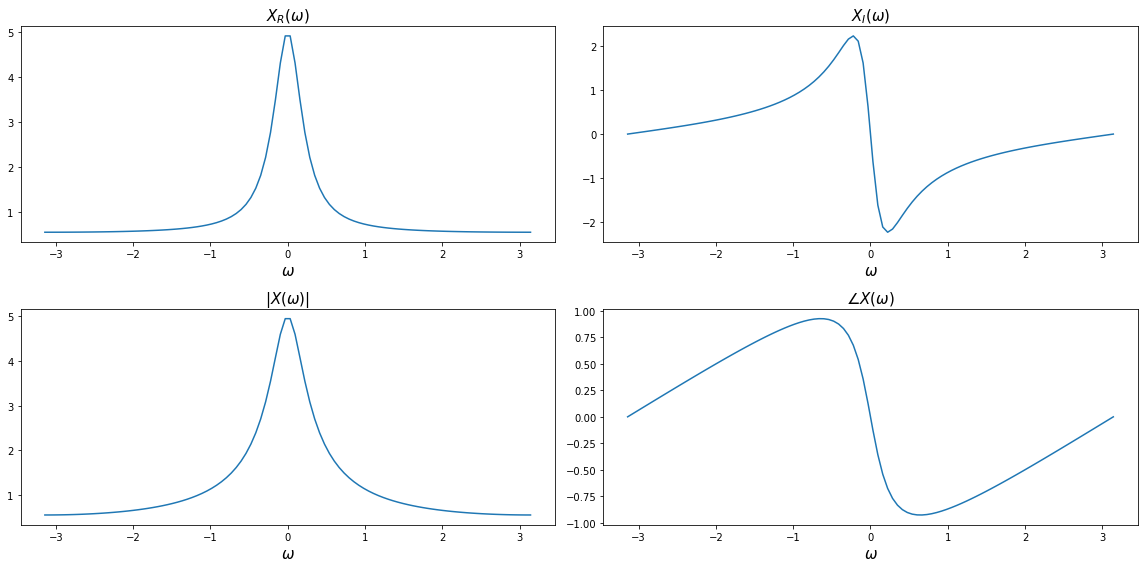

In [18]:
#def x(w)
def q4f(w,a):
    if -1<=a<=1:
        xw=1/(1-a*np.exp(-1j*w))
    else:
        xw=0
    return xw
w2 = np.linspace(-np.pi,np.pi,100)
Xw=q4f(w2,0.8)

plt.figure(figsize=(16,8))
#plotting Real part of X(w)
plt.subplot(221)
plt.plot(w2,Xw.real)
plt.title(r'$X_R(\omega)$' , size= 15)
plt.xlabel('$\omega$' , size = 15 )

#plotting Imaginary part of X(w)
plt.subplot(222)
plt.plot(w2,Xw.imag)
plt.title(r'$X_I(\omega)$' , size= 15)
plt.xlabel('$\omega$' , size = 15 )

#plotting Magnitude
plt.subplot(223)
plt.plot(w2,abs(Xw))
plt.title(r'$|X(\omega)|$' , size= 15)
plt.xlabel('$\omega$' , size = 15 )

#plotting phase
plt.subplot(224)
plt.plot(w2,np.angle(Xw))
plt.title(r'$\angle X(\omega)$' , size= 15)
plt.xlabel('$\omega$' , size = 15 )
plt.tight_layout()

### Ques5

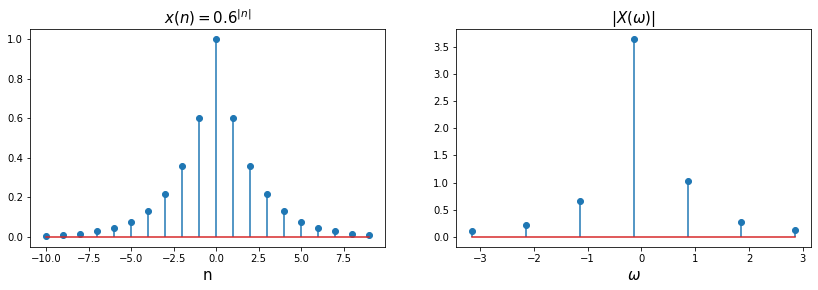

In [22]:
n2=np.arange(-10,10,1)
w3=np.arange(-np.pi,np.pi,1)
def q5fun(n):
    return 0.6**abs(n)
q5m,q5p=fourier_transform(n2,q5fun,w3)

plt.figure(figsize=(14,4))
#plotting input function
plt.subplot(121)
plt.stem(n2,q5fun(n2))
plt.title('$x(n) = 0.6^{|n|}$' , size= 15)
plt.xlabel('n' , size = 15)

#plotting magnitude
plt.subplot(122)
plt.stem(w3,q5m)
plt.title('$|X(\omega)|$' , size= 15)
plt.xlabel('$\omega$' , size = 15 )
plt.show()

### Ques6

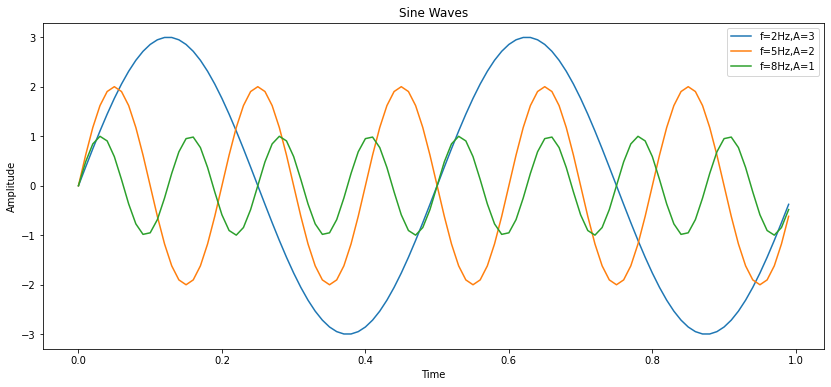

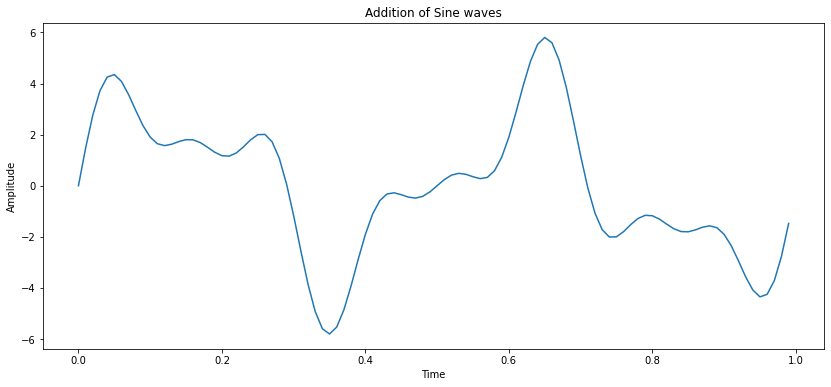

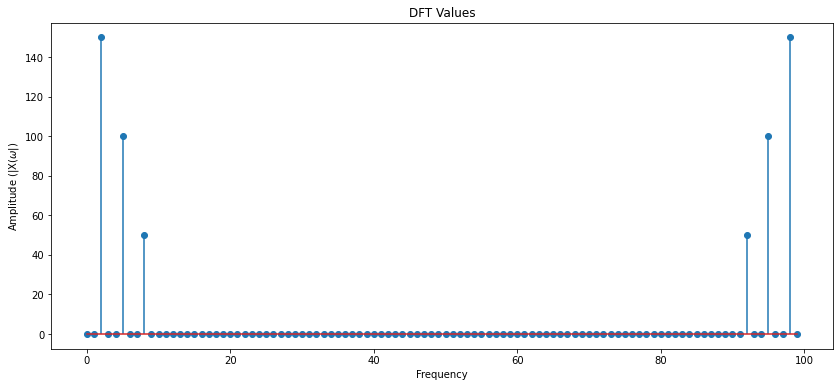

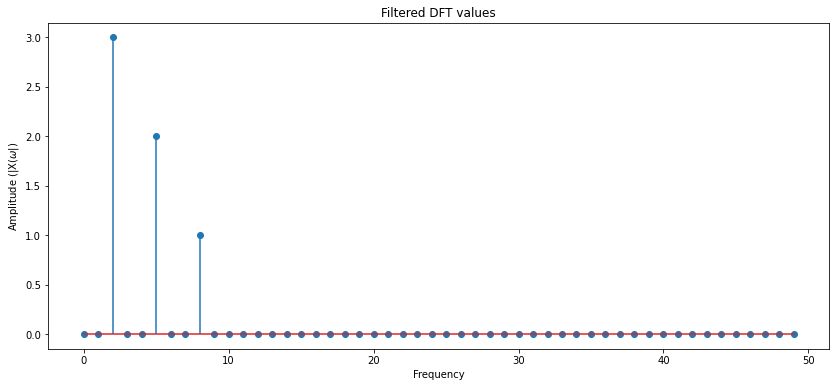

In [24]:
#Sine function for different amplitude and freq
def sinefun(f,amp):
    return amp*np.sin(2*np.pi*f*tsin1)

#Discrete Fourier Transform function
def DFT(x):
    N=len(x)
    n=np.arange(N)
    k=n.reshape((N,1))
    e=np.exp(np.complex(0,-2)*np.pi*k*n/N)
    X=np.dot(e,x)
    return X

fs=100
ts=1/fs
tsin1=np.arange(0,1,ts)

#Sine functions for given amplitude and frequency
sine1=sinefun(2,3)
sine2=sinefun(5,2)
sine3=sinefun(8,1)

#Sum of 3 sine functions
sinesum=sine1+sine2+sine3

#DFT
xsin=sinesum
Xsin=DFT(xsin)
Nsin=len(Xsin)
nsin=np.arange(Nsin)
Tsin=Nsin/fs
freq=nsin/Tsin

#filtering
n_o=Nsin//2
f_o=freq[:n_o]
X_o=Xsin[:n_o]/n_o

#Comparing with inbuilt function
from scipy.fft import fft,fftfreq
ydft=fft(sinesum)

plt.figure(figsize=(14,6))
#plotting sine functions
plt.plot(tsin1,sine1,label='f=2Hz,A=3')
plt.plot(tsin1,sine2,label='f=5Hz,A=2')
plt.plot(tsin1,sine3,label='f=8Hz,A=1')
plt.legend()
plt.title('Sine Waves')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.figure(figsize=(14,6))
plt.plot(tsin1,sinesum)
plt.title('Addition of Sine waves')
plt.xlabel('Time')
plt.ylabel('Amplitude')


plt.figure(figsize=(14,6))
plt.stem(freq,abs(Xsin))
plt.title('DFT Values')
plt.xlabel('Frequency')
plt.ylabel('Amplitude (|X($\omega$|)')

plt.figure(figsize=(14,6))
plt.stem(f_o,abs(X_o))
plt.title('Filtered DFT values')
plt.xlabel('Frequency')
plt.ylabel('Amplitude (|X($\omega$|)')
plt.show()

#### It is clear that the output of DFT is symmetric

<StemContainer object of 3 artists>

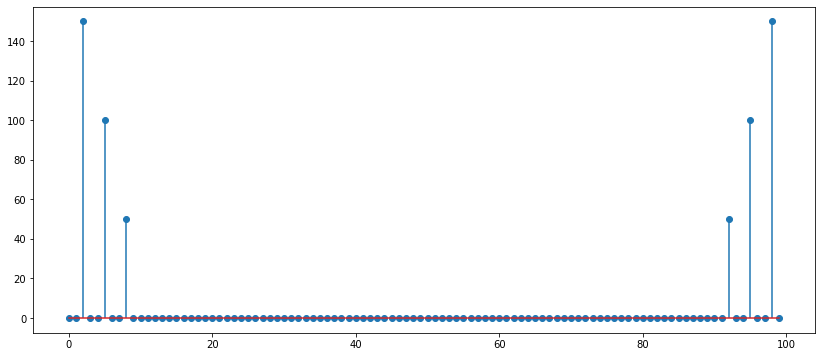

In [25]:
plt.figure(figsize=(14,6))
plt.stem(freq,abs(ydft))

### Ques7

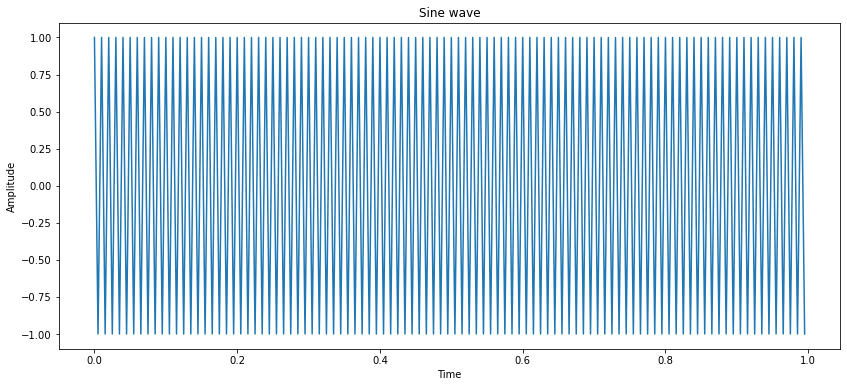

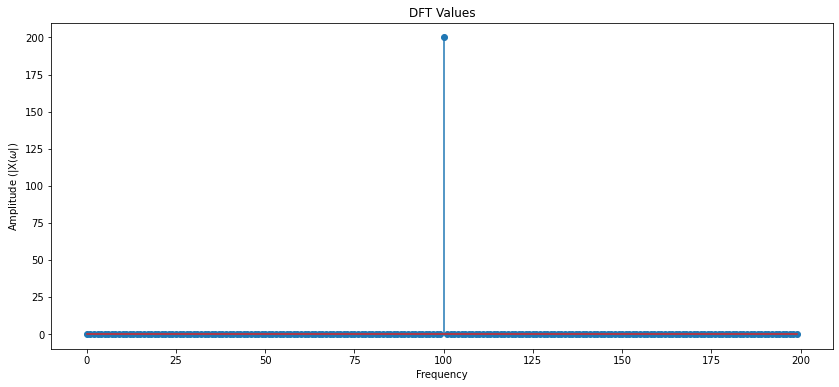

In [26]:
sr=200
ts=1/sr
tsin=np.arange(0,1,ts)
fsin=100
ysin=np.sin(2*np.pi*fsin*tsin+np.pi/2)     #Sine wave

Ysin = DFT(ysin)     #DFT of sine wave
q7freq = np.arange(len(ysin))

plt.figure(figsize=(14,6))
plt.plot(tsin,ysin)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sine wave')


plt.figure(figsize=(14,6))
plt.stem(q7freq,abs(Ysin))
plt.xlabel('Frequency')
plt.ylabel('Amplitude (|X($\omega$|)')
plt.title('DFT Values')
plt.show()

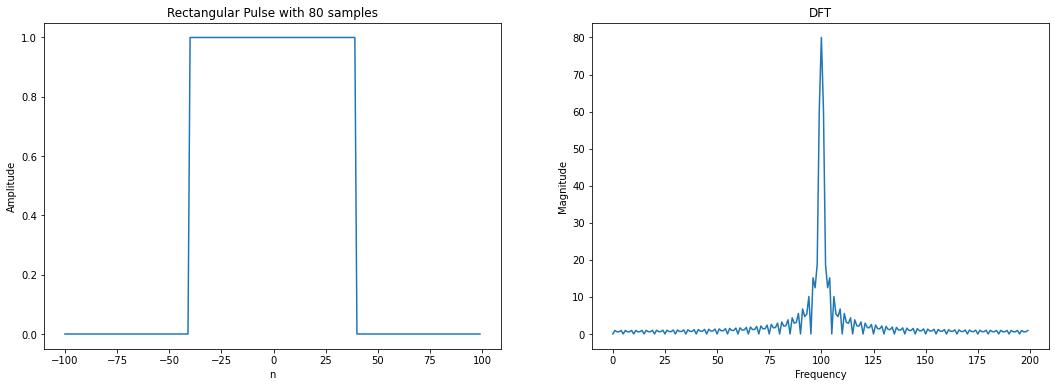

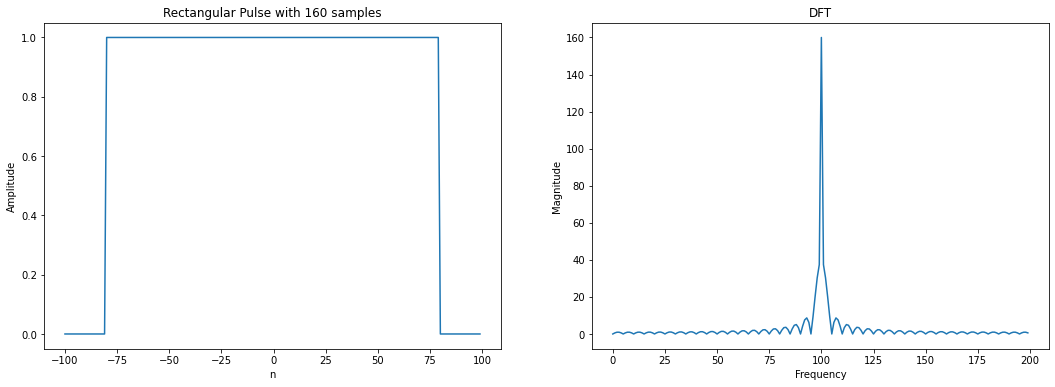

In [31]:
# Generating rectangular windows of 80 and 160 samples
def rectfunc(M):
    n = np.arange(-100,100)
    res = np.zeros(200)
    for i,k in enumerate(n):
        if k>=-M/2 and k<M/2:
            res[i] = 1       
    return (n,res)

rect1 = rectfunc(80)
rect2 = rectfunc(160)


#rectdft1=DFT(rect1[1])
#rectdft2=DFT(rect2[1])
rectdft1 = np.fft.fftshift(np.fft.fft(rect1[1]))
rectdft2 = np.fft.fftshift(np.fft.fft(rect2[1]))
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.plot(rect1[0],rect1[1])
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Rectangular Pulse with 80 samples')

plt.subplot(122)
plt.plot(abs(rectdft1))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('DFT')
plt.show()

plt.figure(figsize=(18,6))
plt.subplot(121)
plt.plot(rect2[0],rect2[1])
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Rectangular Pulse with 160 samples')

plt.subplot(122)
plt.plot(abs(rectdft2))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('DFT')

plt.show()

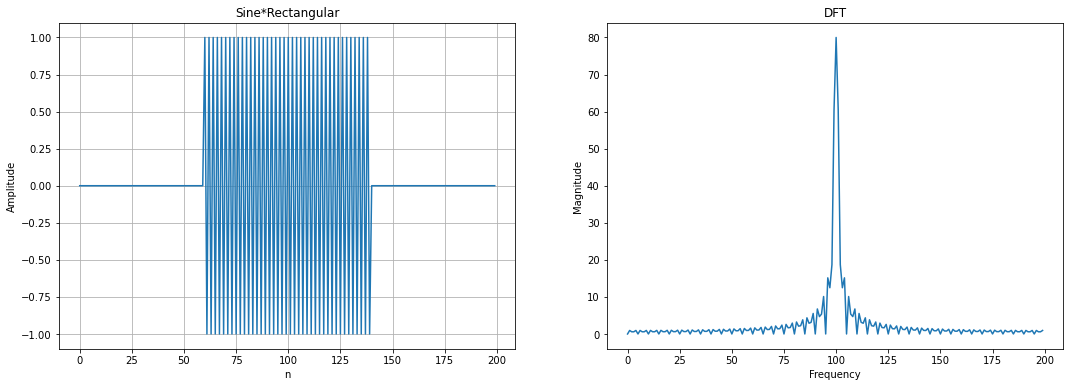

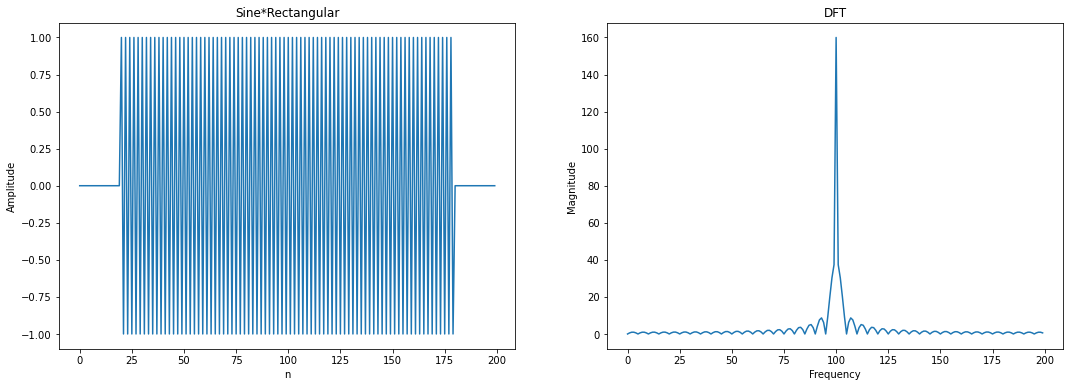

In [32]:
sinrect1 = np.multiply(ysin,rect1[1])
sinrect2 = np.multiply(ysin,rect2[1])

sinrectdft1 = DFT(sinrect1)
sinrectdft2 = DFT(sinrect2)

plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(sinrect1)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Sine*Rectangular')
plt.grid()

plt.subplot(122)
plt.plot(abs(sinrectdft1))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('DFT')
plt.show()

plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(sinrect2)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Sine*Rectangular')


plt.subplot(122)
plt.plot(abs(sinrectdft2))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('DFT')
plt.show()